In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Preprocessing:
from sklearn.preprocessing import StandardScaler

# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#importing data file
dataSet = pd.read_csv('Loan_Sheet_Session 3 (MLP).csv')

In [3]:
dataSet.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataSet.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
count = dataSet.Loan_Status.value_counts()
print(count)

Y    422
N    192
Name: Loan_Status, dtype: int64


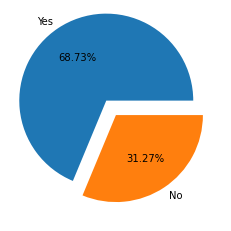

In [7]:
myexp = [0.2, 0]
plt.pie (count, labels = ("Yes","No") , explode = myexp, autopct = "%.2f%%")
plt.show()

In [8]:
dataSet.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#removing null values
dataSet.dropna(axis = 0, inplace = True)
dataSet.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Male = 0, Female = 1
dataSet['Gender'] = dataSet['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})
# Yes = 1, No = 0
dataSet['Married'] = dataSet['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})
# Graduate = 1, Not Graduate = 0
dataSet['Education'] = dataSet['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
# Yes: 1 # No : 0 # unknown:2
dataSet['Self_Employed'] = dataSet['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})
dataSet['Property_Area'] = dataSet['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})
dataSet['Loan_Status'] = dataSet['Loan_Status'].replace({'Y':1, 'N':0})
dataSet['Dependents'] = dataSet['Dependents'].replace({'3+':3})
dataSet.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


# Train & Test Split 

In [11]:
x = dataSet.iloc[:,1:-1]
y = dataSet.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)
x.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0


# KNN Accuracy

In [12]:
Learn = KNeighborsClassifier(n_neighbors=10)
Learn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [13]:
print("Accuracy: ", Learn.score(x_test, y_test)*100)

Accuracy:  70.83333333333334


# Input

In [14]:
Gender= input("Input Gender 1 for Male 0 for Female: ")
Married= input("If marrried Input 1 for Yes and 0 for No: ")
Dependents= input("Depedents present ? \n Input 1, 2 or 3+ in case of more than 3: ")
Education= input ("Education level \n Input 0 for Not Graduate 0 and 1 for Graduate: ")
SelfEmp= input("Self employed ? \nInput 1 for Yes 0 for No: ")
AppInc= input("Enter Applicant income: ")
CoApInc=input("Enter co Applicant income: ")
LoanAmt=input("Enter loan amount: ")
LoanAmtTerm=input("Enter loan amount term: ")
Credithis=input("Enter credit history: ")
PropArea=input("Enter property area 1 for urban and 0 for rural: ")
x_actual_values=[Gender,Married,Dependents,Education,SelfEmp,AppInc,CoApInc,LoanAmt,LoanAmtTerm,Credithis,PropArea]
print (x_actual_values)

Input Gender 1 for Male 0 for Female: 1
If marrried Input 1 for Yes and 0 for No: 0
Depedents present ? 
 Input 1, 2 or 3+ in case of more than 3: 1
Education level 
 Input 0 for Not Graduate 0 and 1 for Graduate: 1
Self employed ? 
Input 1 for Yes 0 for No: 0
Enter Applicant income: 50000
Enter co Applicant income: 25000
Enter loan amount: 10000
Enter loan amount term: 2
Enter credit history: 1
Enter property area 1 for urban and 0 for rural: 1
['1', '0', '1', '1', '0', '50000', '25000', '10000', '2', '1', '1']


In [15]:
x_actual_values=np.array(x_actual_values).astype('int16')
x_actual_values=x_actual_values.reshape(1,11)
x_actual_values=pd.DataFrame(x_actual_values)
x_actual_values.columns=(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
y_actual_pred=Learn.predict(x_actual_values)
print('Should the person be given a loan ? \n1 for yes 0 for no. \n As per KNN the answer is =',y_actual_pred)

Should the person be given a loan ? 
1 for yes 0 for no. 
 As per KNN the answer is = [1]


# Decision Tree

In [16]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [17]:
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_t = df.predict(x_test)

In [19]:
dt = np.sum((y_test == y_t))/y_test.size 

In [20]:
print ("Accuracy: ", dt*100) 

Accuracy:  70.13888888888889


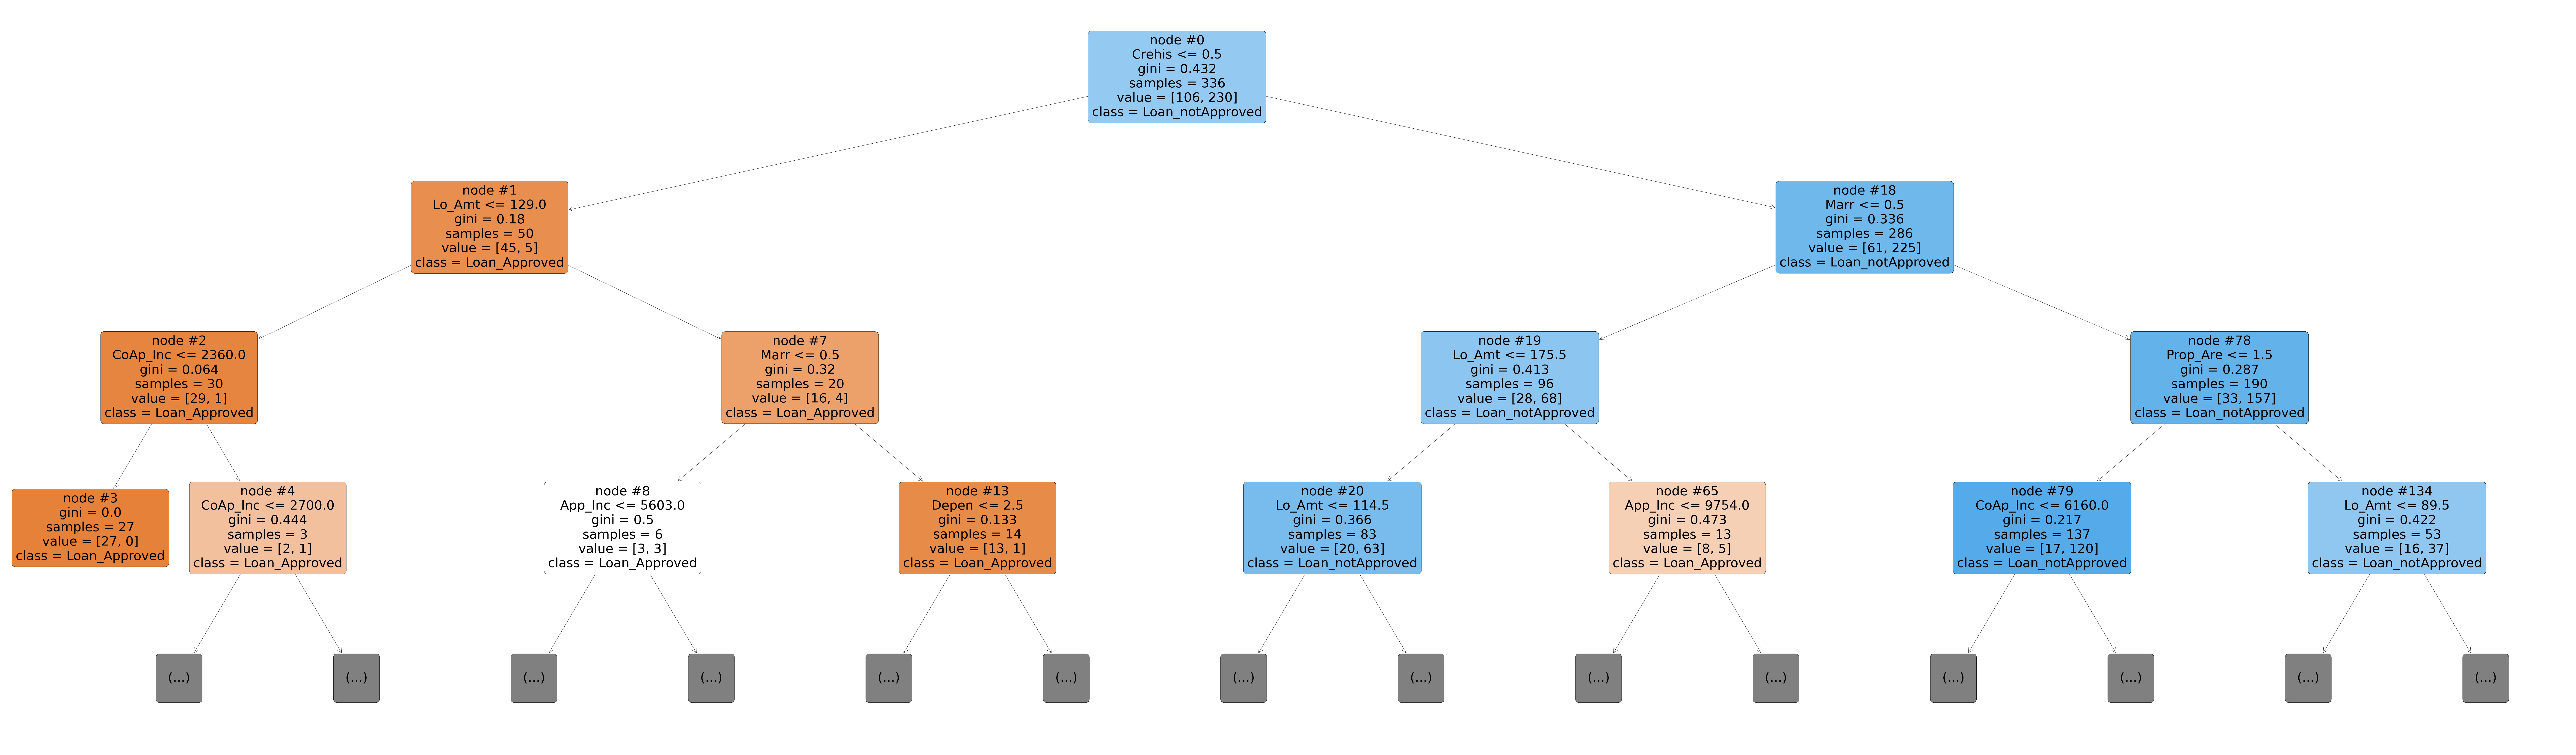

In [21]:
_= plt.figure(figsize=(200,60))
_= plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_= plt.show()

# Decision Tree Entropy

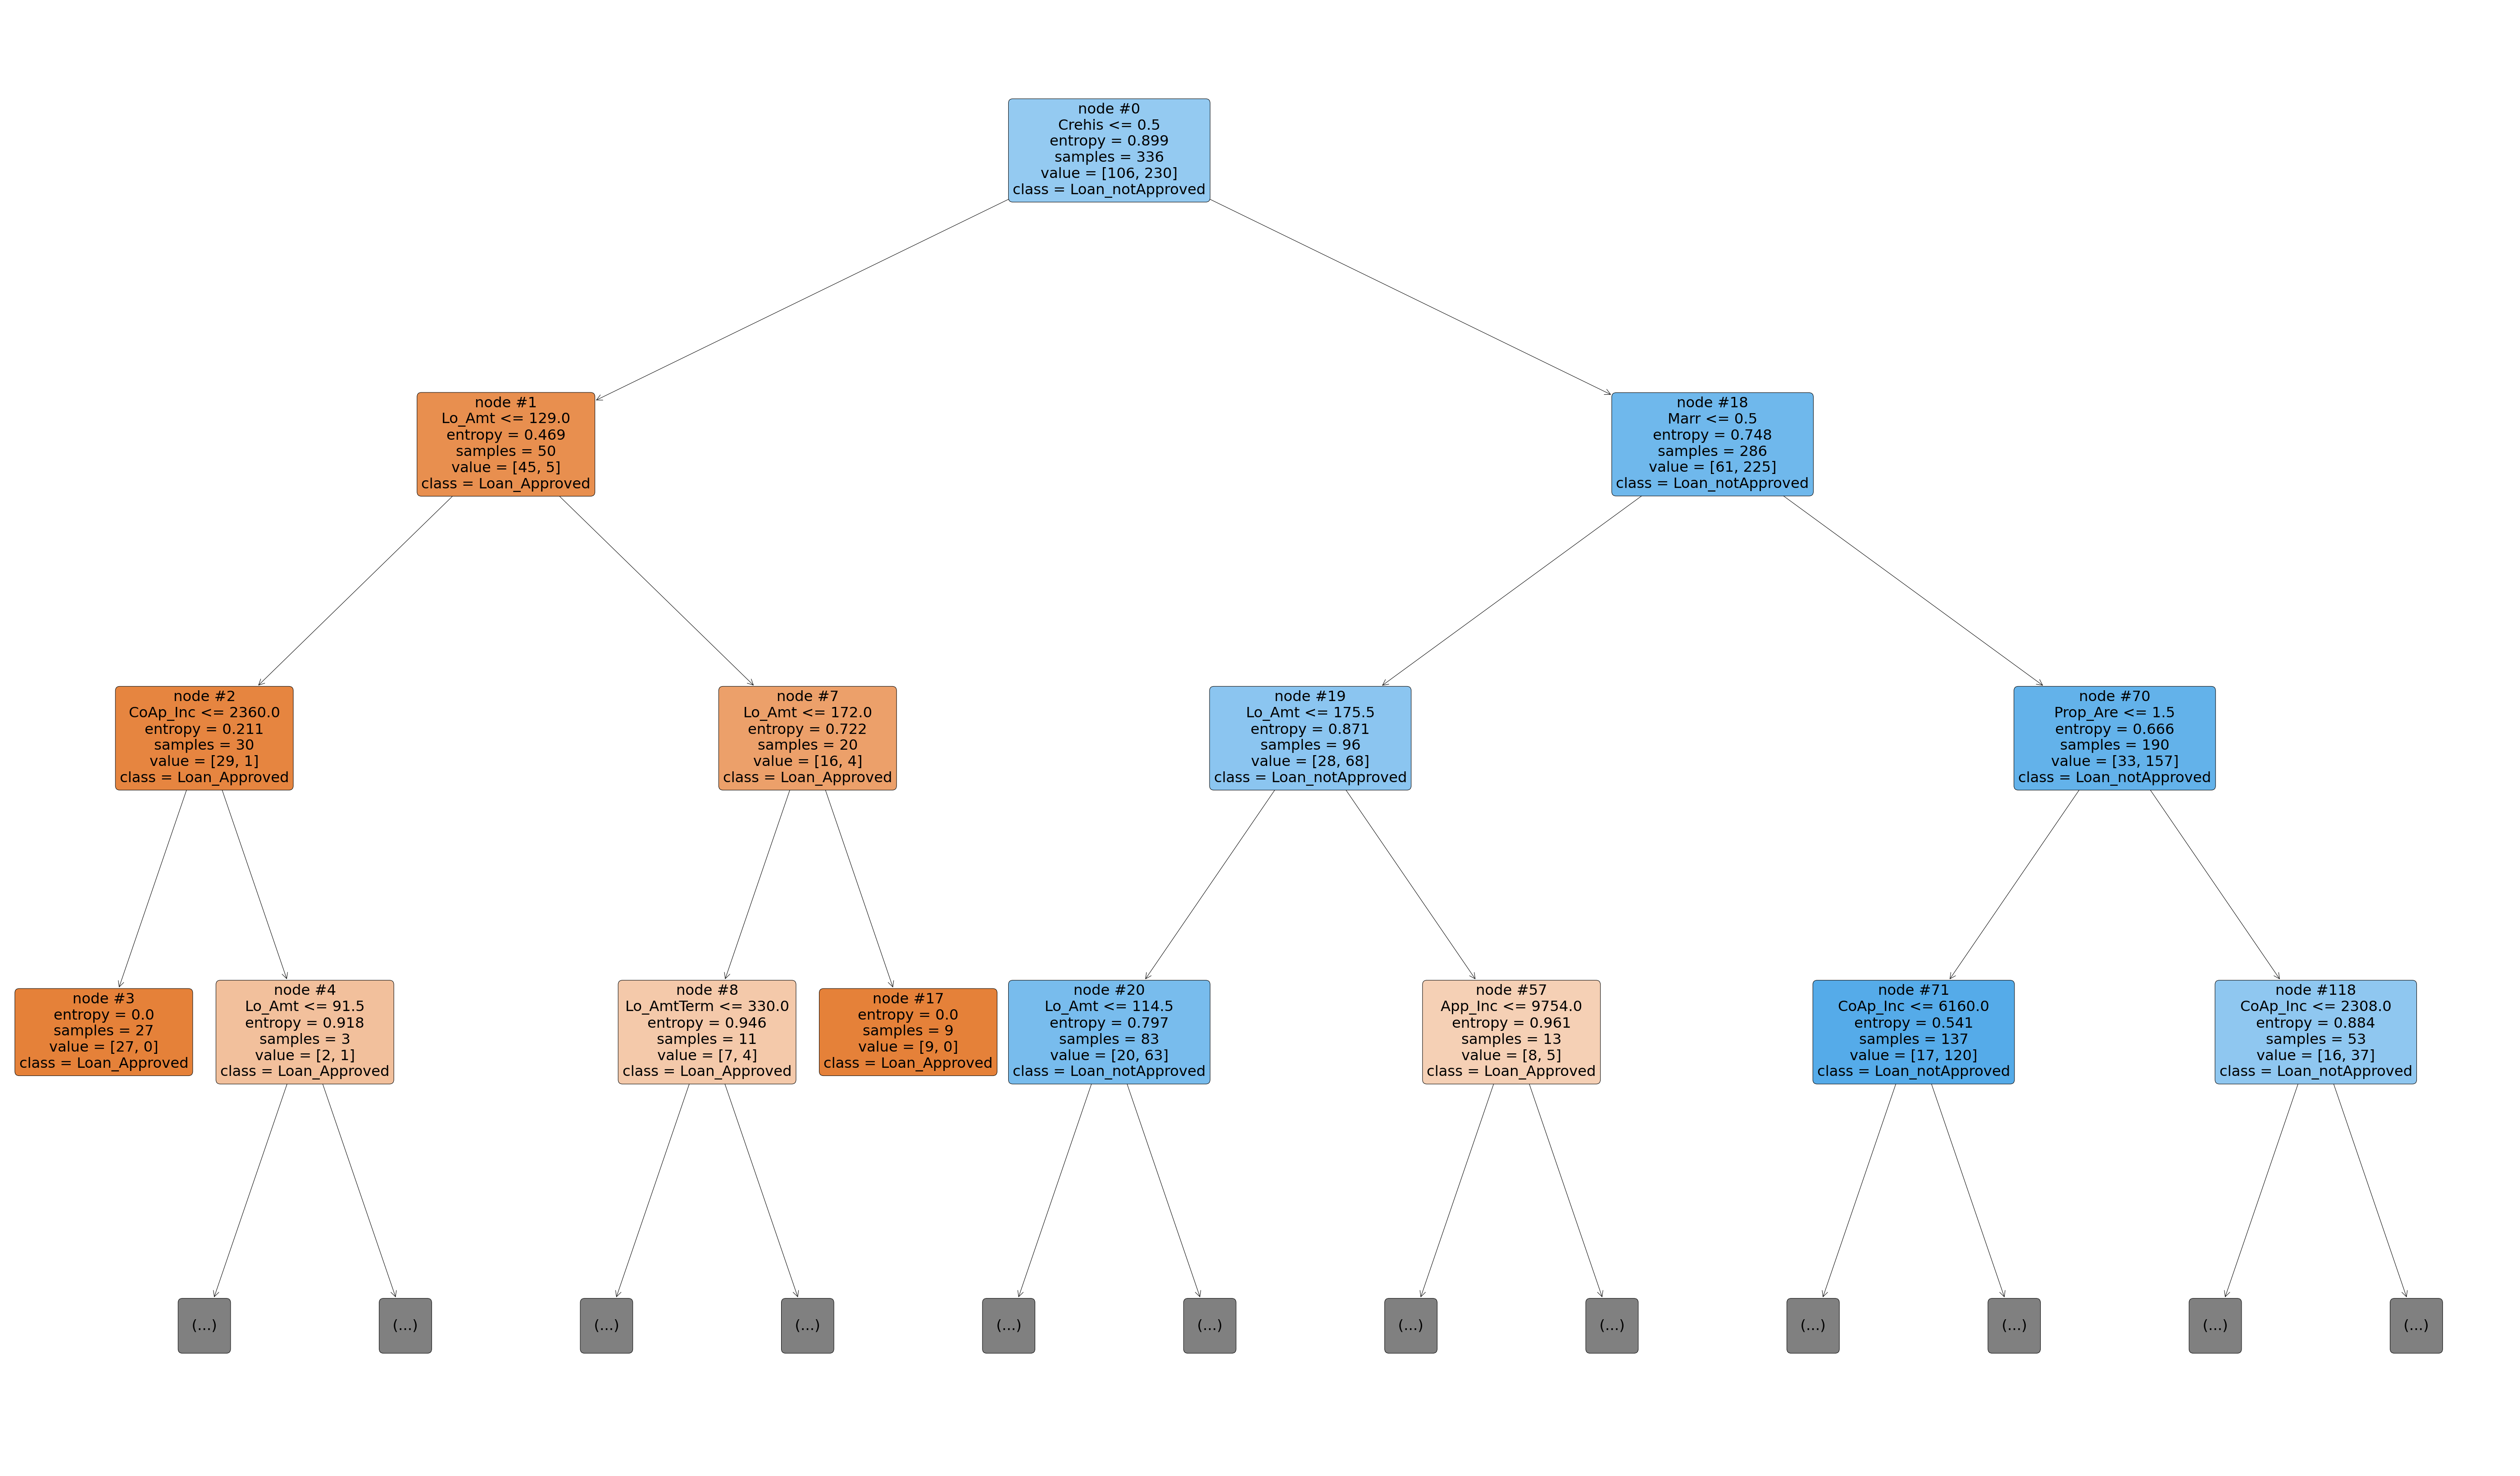

In [22]:
df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

_=df.fit(x_train,y_train)


_=plt.figure(figsize=(100,60))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_=plt.show()

In [23]:
y_t = df.predict(x_test)
de = np.sum((y_test == y_t))/y_test.size

In [24]:
print ("Accuracy: ", de*100)

Accuracy:  74.30555555555556


In [25]:
fi = df.feature_importances_
fi

array([0.01129937, 0.01916711, 0.04327184, 0.        , 0.04383852,
       0.21189554, 0.10936598, 0.26001782, 0.06371647, 0.21475816,
       0.0226692 ])

In [26]:
list(zip(x_actual_values.columns, fi))

[('Gender', 0.011299365656416135),
 ('Married', 0.019167109715125745),
 ('Dependents', 0.04327184102355327),
 ('Education', 0.0),
 ('Self_Employed', 0.04383851608262467),
 ('ApplicantIncome', 0.2118955390633327),
 ('CoapplicantIncome', 0.1093659785857601),
 ('LoanAmount', 0.260017824807993),
 ('Loan_Amount_Term', 0.06371646551459723),
 ('Credit_History', 0.21475816164835243),
 ('Property_Area', 0.022669197902244715)]

# Random Forest

In [27]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [28]:
clf.score(x_test, y_test)

0.7986111111111112

In [29]:
y_pred = clf.predict(x_test)

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)

[[26 16]
 [13 89]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        42
           1       0.85      0.87      0.86       102

    accuracy                           0.80       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.79      0.80      0.80       144



In [32]:
y_pred = clf.predict(x_test)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2013888888888889
Mean Squared Error: 0.2013888888888889
Root Mean Squared Error: 0.44876373392787533


In [34]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy score is: ", accuracy_score(y_test, y_pred)*100, "%")

[[26 16]
 [13 89]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        42
           1       0.85      0.87      0.86       102

    accuracy                           0.80       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.79      0.80      0.80       144

Accuracy score is:  79.86111111111111 %


Text(33.0, 0.5, 'Actual')

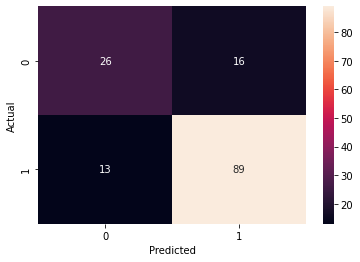

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

KNN Accuracy = 70.83%, Decision Tree classfier Accuracy using Gini = 70.13%, Decision Tree classifier Accuracy using Entropy is 74.30% and Random Forest Accuracy is 79.86%. Hence in this case Random forest is the most accurate.